# K-Nearest-Neighbors
KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting 
of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a
function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

# Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

# Problem statement

Dataset:
The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald 
Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). 
Four features were measured from each sample: the length and the width of the sepals and petals.

Source: https://archive.ics.uci.edu/ml/datasets/Iris

Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.

# Question 1
Import libraries and load the dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
df = pd.read_csv('iris-1.csv')

# Data Pre-processing

# Question 2 - Estimating missing values
Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have 
to see how to replace those missing values with some estimated values (median)

In [2]:
df.isnull().sum()

Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

In [3]:
df.fillna(df.median(), inplace = True)

In [4]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Question 3 - Dealing with categorical data
Change all the classes to numericals (0to2).

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

# Question 4
Observe the association of each independent variable with target variable and drop variables from feature set having correlation 
in range -0.1 to 0.1 with target variable.

In [6]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.702734,-0.392693,0.872346,0.890676,0.942753
SepalLengthCm,0.702734,1.000000,-0.109369,0.871120,0.815986,0.775061
SepalWidthCm,-0.392693,-0.109369,1.000000,-0.420713,-0.356510,-0.417318
PetalLengthCm,0.872346,0.871120,-0.420713,1.000000,0.962043,0.944477
PetalWidthCm,0.890676,0.815986,-0.356510,0.962043,1.000000,0.952513
Species,0.942753,0.775061,-0.417318,0.944477,0.952513,1.000000


# Question 5
Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). 
They will be having almost no influence on the classification.

In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,76.500000,5.843421,3.053289,3.766447,1.203289,1.013158
std,44.022721,0.822584,0.430757,1.754000,0.759698,0.821780
min,1.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,38.750000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,76.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,114.250000,6.400000,3.300000,5.100000,1.800000,2.000000
max,152.000000,7.900000,4.400000,6.900000,2.500000,2.000000


# Question 6
Plot the scatter matrix for all the variables.

/Users/sumeet/anaconda3/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/sumeet/anaconda3/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


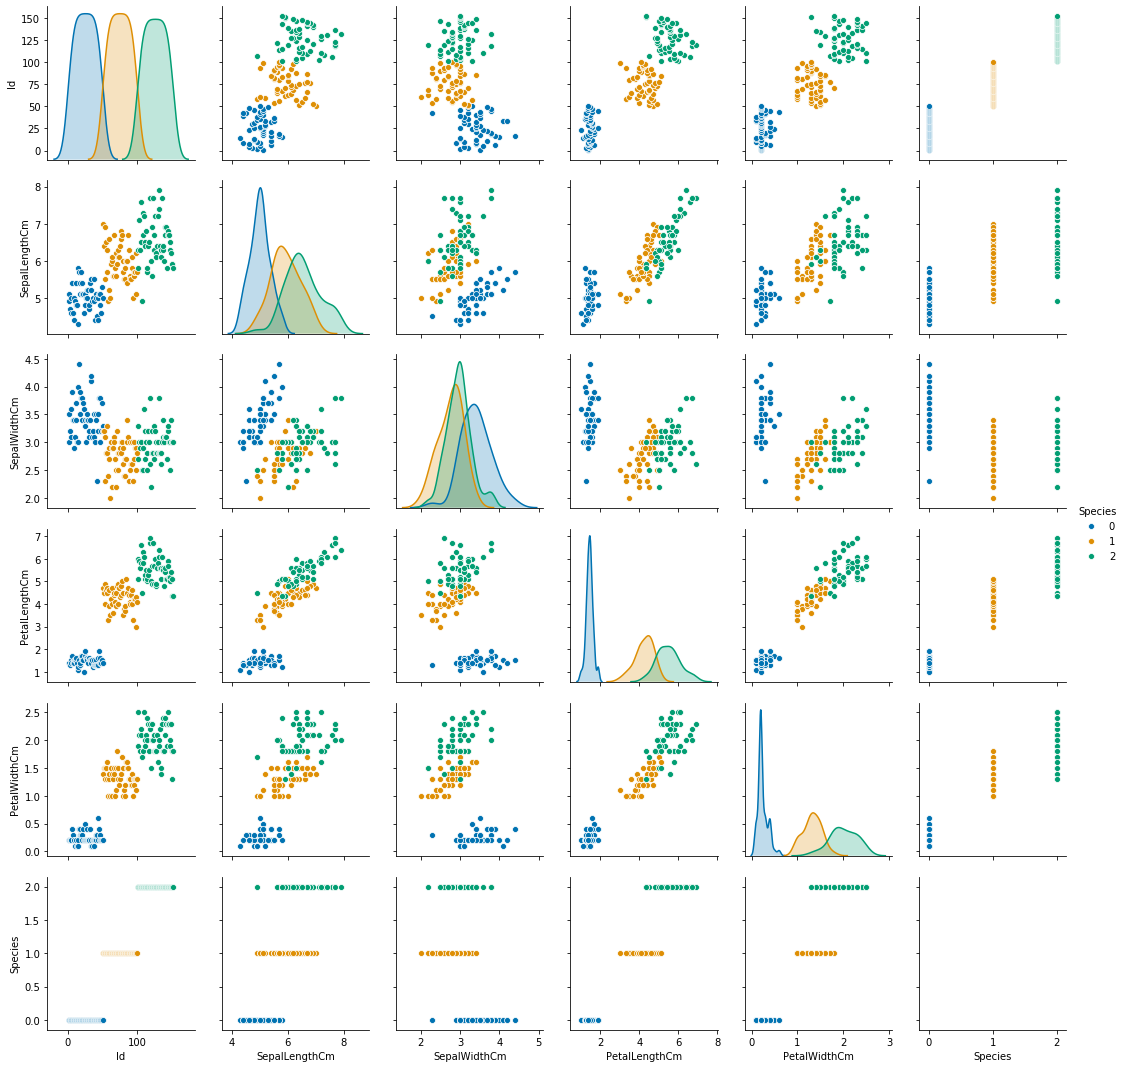

In [8]:
sns.pairplot(df,  hue = "Species", palette="colorblind")

# Split the dataset into training and test sets

# Question 7
Split the dataset into training and test sets with 80-20 ratio.

In [9]:
from sklearn.model_selection import train_test_split

X = np.array(df.ix[:, 1:5]) 
y = np.array(df['Species'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

/Users/sumeet/anaconda3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/sumeet/anaconda3/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)


# Question 8 - Model
Build the model and train and test on training and test sets respectively using scikit-learn. Print the Accuracy of the model with different values of k=3,5,9.

Hint: For accuracy you can check accuracy_score() in scikit-learn

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

for k in [1, 3, 5, 9, 19]:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    print("k:", k)
    #print("r2:",r2_score(y_test, y_predict))
    print("accuracy:",accuracy_score(y_test, y_predict))


k: 1
accuracy: 0.9347826086956522
k: 3
accuracy: 0.9347826086956522
k: 5
accuracy: 0.9347826086956522
k: 9
accuracy: 0.9347826086956522
k: 19
accuracy: 0.9347826086956522


# Question 9 - Cross Validation
Run the KNN with no of neighbours to be 1,3,5..19 and *Find the optimal number of neighbours from the above list using the Mis 
classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the 
model with lowest MSE

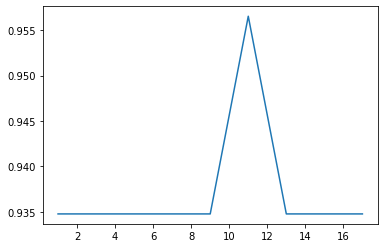

In [22]:
sc = []

for k in range(1, 19, 2):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    sc.append(accuracy_score(y_test, y_predict))

plt.plot([k for k in range(1, 19, 2)], sc)
    


# Question 10
Plot misclassification error vs k (with k value on X-axis) using matplotlib.